# importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


# getting the dataset

In [2]:
dataset = pd.read_csv('/home/roy/Downloads/HeartRate.xls_shaped.csv') 

# splitting the dataset in inputs and outputs

In [3]:
# input 
x = dataset.iloc[:, [0, 1]].values 

# output 
y = dataset.iloc[:, 2].values 


# dividing the dataset in training data and test data

In [4]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
		x, y, test_size = 0.25, random_state = 0) 


# training the model

In [5]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 


/home/roy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# testing the model

In [6]:
y_pred = classifier.predict(xtest) 


# getting the confusion matrix for accuracy

In [7]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 

print ("Confusion Matrix : \n", cm) 


Confusion Matrix : 
 [[ 8  1]
 [ 1 23]]


# calculating the accuracy

In [8]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 


Accuracy :  0.9393939393939394


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


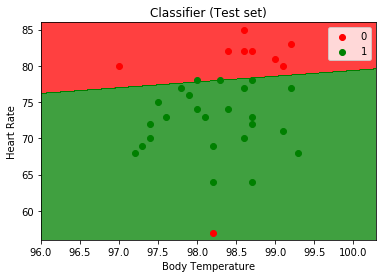

In [9]:
from matplotlib.colors import ListedColormap 
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,  
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1,  
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j) 
      
plt.title('Classifier (Test set)') 
plt.xlabel('Body Temperature') 
plt.ylabel('Heart Rate') 
plt.legend() 
plt.show() 

# saving the model

In [10]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(classifier, 'predict.pkl') 

/home/roy/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['predict.pkl']